# Mol2vec Example: Amino Acids

In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
import seaborn as sns
from mol2vec.features import mol2alt_sentence
from mol2vec.helpers import depict_identifier, plot_2D_vectors, IdentifierTable

Amino acid SMILES and labels

In [2]:
aa_smis = ['CC(N)C(=O)O', 'N=C(N)NCCCC(N)C(=O)O', 'NC(=O)CC(N)C(=O)O', 'NC(CC(=O)O)C(=O)O',
          'NC(CS)C(=O)O', 'NC(CCC(=O)O)C(=O)O', 'NC(=O)CCC(N)C(=O)O', 'NCC(=O)O',
          'NC(Cc1cnc[nH]1)C(=O)O', 'CCC(C)C(N)C(=O)O', 'CC(C)CC(N)C(=O)O', 'NCCCCC(N)C(=O)O',
          'CSCCC(N)C(=O)O', 'NC(Cc1ccccc1)C(=O)O', 'O=C(O)C1CCCN1', 'NC(CO)C(=O)O',
          'CC(O)C(N)C(=O)O', 'NC(Cc1c[nH]c2ccccc12)C(=O)O', 'NC(Cc1ccc(O)cc1)C(=O)O',
          'CC(C)C(N)C(=O)O']
aa_codes = ['ALA', 'ARG', 'ASN', 'ASP', 'CYS', 'GLU', 'GLN', 'GLY', 'HIS', 'ILE', 
            'LEU', 'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR', 'TRP', 'TYR', 'VAL']

Generate molecules using RDKit

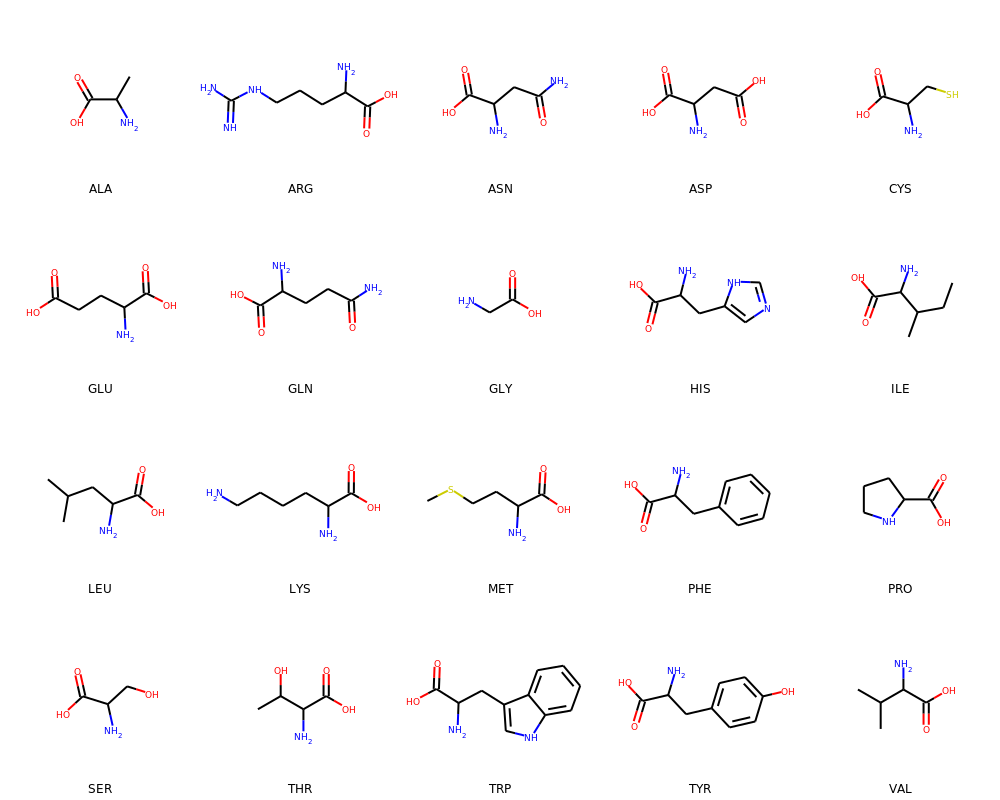

In [3]:
# Generate molecules from SMILES
aas = [Chem.MolFromSmiles(x) for x in aa_smis]
# Draw molecules
Draw.MolsToGridImage(aas, molsPerRow=5, useSVG=False, legends=aa_codes)

Generating fingerprints for the molecule 'ALA'

In [5]:
# A fingerprint is a 'sentence', made up of 'words', which are chemical substructures.
# Usage: mol2alt_sentence(molecule, radius)
sentence = mol2alt_sentence(aas[0], 1)
print("Number of ids:", len(sentence))
print("Substructure IDs:")
sentence

Number of ids: 12
Substructure IDs:


['2246728737',
 '3537119515',
 '2245273601',
 '2655406212',
 '847957139',
 '2599973650',
 '2246699815',
 '3855312692',
 '864942730',
 '1510328189',
 '864662311',
 '1533864325']

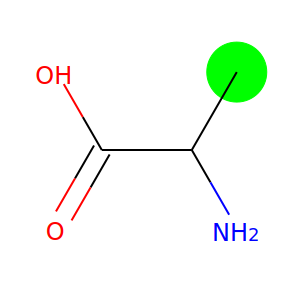

In [7]:
# Display a substructure, or 'word'
# Usage: depict_identifier(molecule, word, radius)
depict_identifier(aas[0], 2246728737, 1)

Displaying all fingerprints in 'ALA'

In [8]:
# Usage: IdentifierTable(words, molecules, sentences, columns, radius)
it = IdentifierTable(sentence, [aas[0]]*len(sentence), [sentence]*len(sentence), 5, 1)
it



Load a pre-trained Mol2vec model which was trained on 20 million compounds downloaded from ZINC using:

   - radius 1
   - UNK to replace all identifiers that appear less than 4 times
   - skip-gram and window size of 10
   - resulting in 300 dimensional embeddings

In [9]:
from gensim.models import word2vec

model = word2vec.Word2Vec.load('model_300dim.pkl')

Number of unique identifiers in the model represented as vectors.

In [10]:
len(model.wv.vocab.keys())

21003

Convert a word into a 300-dimensional vector

In [11]:
model.wv.word_vec('3537119515')

array([-0.08452535, -0.0193157 , -0.23864682, -0.08191817,  0.21388696,
       -0.03140714, -0.07247972, -0.03023389,  0.36356503, -0.42839232,
        0.06353441,  0.2131722 ,  0.09356161,  0.08126955, -0.22835147,
       -0.28014293,  0.3058461 , -0.14926122, -0.09337816,  0.261518  ,
       -0.07041138,  0.38526052,  0.29088268,  0.24332431,  0.03673011,
        0.2637293 , -0.13100065, -0.3073785 ,  0.03213302, -0.15721917,
        0.07156416, -0.07594339, -0.36613473,  0.06353607,  0.17045209,
       -0.21497913, -0.03296117,  0.00836317,  0.32944074, -0.13633271,
       -0.04841704, -0.10161942, -0.07341361, -0.42496884, -0.13124529,
        0.21394505, -0.1135415 ,  0.49060041,  0.05622109, -0.06058135,
        0.07585122, -0.43850958,  0.01021269, -0.37780493, -0.37465027,
       -0.14082809,  0.11449549,  0.08082432,  0.1153601 ,  0.21170419,
        0.13918886,  0.03633586, -0.43339786,  0.07751735, -0.4588137 ,
        0.12112459,  0.3261213 ,  0.17726666, -0.16212235, -0.01

Extraction of identifiers from all the molecules (amino acids) in our library

In [12]:
# Find unique identifiers in data set
aa_sentences = [mol2alt_sentence(x, 1) for x in aas]
flat_list = [item for sublist in aa_sentences for item in sublist]
aa_identifiers_unique = set(flat_list)

In [14]:
Put identifiers in a pandas data frame

In [13]:
df_vec = pd.DataFrame()
df_vec['identifier'] = list(aa_identifiers_unique)
df_vec.index = df_vec['identifier']
df_vec.head()

,identifier
identifier,
4022716898,4022716898
2655406212,2655406212
2117068077,2117068077
2438720939,2438720939
4252058327,4252058327


In [15]:
# Number of unique identifiers in amino acid data set
len(df_vec)

75

Converting each unique word into a vector.

In [20]:
df_vec['mol2vec'] = [model.wv.word_vec(x) for x in aa_identifiers_unique]
df_vec.head(2)

,identifier,mol2vec
identifier,,
4022716898,4022716898,"[0.0550803, 0.16976, -0.0617969, -0.203482, 0.179345, 0.113655, 0.320856, -0.0599592, 0.0438465, 0.17565, 0.0770341, -0.177756, 0.0346232, 0.146109, -0.16527, 0.01376, 0.159044, -0.421712, -0.420422, -0.153242, 0.539744, 0.190818, 0.35323, 0.00945306, -0.0473092, 0.486545, -0.310599, -0.0675227, -0.218203, -0.0576224, 0.249646, 0.152841, -0.408672, 0.0656924, -0.0514263, 0.0960301, -0.256196, 0.233568, 0.0529111, -0.2122, 0.525049, 0.236454, -0.440514, -0.0646998, -0.23814, -0.279009, -0.488557, 0.0871753, -0.115603, 0.103338, -0.149802, -0.0141716, -0.247269, -0.0510097, -0.183124, -0.452413, -0.0619474, 0.0837184, 0.389634, 0.264658, 0.0587423, -0.00883025, -0.0626814, 0.184835, 0.317948, -0.17903, -0.0189854, 0.0544184, -0.643969, -0.159048, -0.162591, 0.399047, 0.413324, 0.210652, 0.0483955, 0.183217, -0.108426, -0.0081872, 0.156928, 0.19788, 0.352969, 0.385361, -0.0231793, -0.267675, 0.120394, -0.207721, 0.176537, 0.158282, -0.00983056, -0.153019, 0.204417, -0.124889, 0.0399572, -0.201841, -0.0162584, -0.0970364, 0.0211702, 0.0298734, 0.474759, -0.631983, ...]"
2655406212,2655406212,"[0.070078, 0.823527, -0.0971469, 0.035869, -0.116055, 0.0365223, 0.0893234, -0.454195, 0.253525, -0.0559116, -0.0281768, 0.370002, 0.415021, 0.0887676, -0.184786, -0.00254433, 0.635325, -0.437299, -0.294998, 0.556848, -0.250818, -0.133382, 0.277537, 0.114575, -0.121508, 0.152438, -0.294288, -0.133472, 0.0547794, -0.288829, -0.0364687, -0.173563, -0.239027, 0.0196082, 0.139219, -0.37107, 0.0901397, -0.019694, 0.0656985, 0.218995, 0.0775519, 0.202355, -0.413562, 0.220944, 0.103157, 0.0915389, 0.0555098, 0.478337, -0.0910774, 0.0383942, -0.190702, 0.0661122, 0.23661, -0.245452, -0.0309143, -0.551901, -0.342125, -0.206727, -0.0133005, -0.0806552, 0.391221, 0.18689, -0.280738, -0.139886, -0.195301, 0.0723965, -0.153828, 0.350451, -0.024316, 0.223362, 0.00886388, -0.0628751, 0.261687, 0.162048, 0.524962, 0.103017, -0.196801, -0.221645, 0.487972, 0.17487, 0.405926, 0.378825, -0.14096, -0.480385, -0.253406, -0.161529, -0.275172, 0.130989, -0.598763, 0.38215, -0.178972, 0.251159, -0.106462, 0.15614, -0.234581, 0.0332123, 0.514306, 0.00210781, 0.397342, -0.618697, ...]"


To find the vector for a molecule, we only need to add the component vectors of the words in its sentence.

In [69]:
# Words for 'ALA'
sentence = mol2alt_sentence(aas[0], 1)
# Get word vectors
components = df_vec.loc[sentence]['mol2vec']
# Get total vector
ALA_vec = np.sum(components)
print("Length of vector:", len(ALA_vec))
ALA_vec

Length of vector: 300


array([-0.56623656,  1.66695499, -1.03032672, -0.8486892 ,  1.38927865,
       -0.65651661, -1.93249059, -0.86687881,  2.22788548, -0.5531432 ,
       -0.28141791,  1.43449104,  1.01623154,  0.9744252 , -2.37638068,
        0.28936678,  2.65313268, -3.20678806, -2.36404705,  2.64651704,
       -0.26400548,  1.23166776,  4.88075304,  1.61623859, -0.67045867,
        1.52014434, -2.52590489, -1.94078076,  0.53918517, -0.89173549,
        1.34411049, -2.08149219, -2.4165082 ,  0.18772164,  0.25891036,
        0.62152874,  0.2202107 ,  0.10079446,  1.82635188,  1.158867  ,
        0.28488109,  1.17184007, -0.69543517, -0.81215668, -0.63124448,
        1.25806212,  0.77328885,  4.38785458, -1.26110828,  0.52569669,
        0.82226342, -2.26572824,  0.12348263, -2.50525784, -2.78292727,
       -3.81480718, -1.15301967,  0.71729332,  0.41595849,  0.7058605 ,
       -0.06379641, -0.84249657, -1.67899966,  1.52096105, -4.53695393,
        0.70094609,  1.32169044,  1.45452905, -1.80075598, -1.26

## Feature redution to 2D (Only for visualization purposes)

300 dimensions are hard to visualize, so we poject the 300 dimensional vectors (representing identifiers) to 2 dimensions using a combination of PCA and t-SNE.

In [33]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca_model = PCA(n_components=30)
tsne_model = TSNE(n_components=2, perplexity=10, n_iter=1000, metric = 'cosine')
tsne_pca = tsne_model.fit_transform(pca_model.fit_transform(list((df_vec['mol2vec']))))

Save principal components to data frame.

In [34]:
df_vec['PCA-t-SNE-c1'] = tsne_pca.T[0]
df_vec['PCA-t-SNE-c2'] = tsne_pca.T[1]
df_vec.set_index('identifier')
df_vec.head(2)

,identifier,mol2vec,PCA-t-SNE-c1,PCA-t-SNE-c2
identifier,,,,
4022716898,4022716898,"[0.0550803, 0.16976, -0.0617969, -0.203482, 0.179345, 0.113655, 0.320856, -0.0599592, 0.0438465, 0.17565, 0.0770341, -0.177756, 0.0346232, 0.146109, -0.16527, 0.01376, 0.159044, -0.421712, -0.420422, -0.153242, 0.539744, 0.190818, 0.35323, 0.00945306, -0.0473092, 0.486545, -0.310599, -0.0675227, -0.218203, -0.0576224, 0.249646, 0.152841, -0.408672, 0.0656924, -0.0514263, 0.0960301, -0.256196, 0.233568, 0.0529111, -0.2122, 0.525049, 0.236454, -0.440514, -0.0646998, -0.23814, -0.279009, -0.488557, 0.0871753, -0.115603, 0.103338, -0.149802, -0.0141716, -0.247269, -0.0510097, -0.183124, -0.452413, -0.0619474, 0.0837184, 0.389634, 0.264658, 0.0587423, -0.00883025, -0.0626814, 0.184835, 0.317948, -0.17903, -0.0189854, 0.0544184, -0.643969, -0.159048, -0.162591, 0.399047, 0.413324, 0.210652, 0.0483955, 0.183217, -0.108426, -0.0081872, 0.156928, 0.19788, 0.352969, 0.385361, -0.0231793, -0.267675, 0.120394, -0.207721, 0.176537, 0.158282, -0.00983056, -0.153019, 0.204417, -0.124889, 0.0399572, -0.201841, -0.0162584, -0.0970364, 0.0211702, 0.0298734, 0.474759, -0.631983, ...]",-97.787148,-24.716702
2655406212,2655406212,"[0.070078, 0.823527, -0.0971469, 0.035869, -0.116055, 0.0365223, 0.0893234, -0.454195, 0.253525, -0.0559116, -0.0281768, 0.370002, 0.415021, 0.0887676, -0.184786, -0.00254433, 0.635325, -0.437299, -0.294998, 0.556848, -0.250818, -0.133382, 0.277537, 0.114575, -0.121508, 0.152438, -0.294288, -0.133472, 0.0547794, -0.288829, -0.0364687, -0.173563, -0.239027, 0.0196082, 0.139219, -0.37107, 0.0901397, -0.019694, 0.0656985, 0.218995, 0.0775519, 0.202355, -0.413562, 0.220944, 0.103157, 0.0915389, 0.0555098, 0.478337, -0.0910774, 0.0383942, -0.190702, 0.0661122, 0.23661, -0.245452, -0.0309143, -0.551901, -0.342125, -0.206727, -0.0133005, -0.0806552, 0.391221, 0.18689, -0.280738, -0.139886, -0.195301, 0.0723965, -0.153828, 0.350451, -0.024316, 0.223362, 0.00886388, -0.0628751, 0.261687, 0.162048, 0.524962, 0.103017, -0.196801, -0.221645, 0.487972, 0.17487, 0.405926, 0.378825, -0.14096, -0.480385, -0.253406, -0.161529, -0.275172, 0.130989, -0.598763, 0.38215, -0.178972, 0.251159, -0.106462, 0.15614, -0.234581, 0.0332123, 0.514306, 0.00210781, 0.397342, -0.618697, ...]",-292.112701,43.174313


In [42]:
# Function that returns 2d coordinates of a word
def get_values(identifier):
    return np.array((df_vec['PCA-t-SNE-c1'][str(identifier)], df_vec['PCA-t-SNE-c2'][str(identifier)]))

In [43]:
# Example: getting the 2D embeddings for word '2246728737'
get_values(2246728737)

array([ 142.46751404,   62.49291229], dtype=float32)

## Plotting an amino acid's substructure vectors

A molecule's vector is equal to the sum of the vectors of the words in its sentence

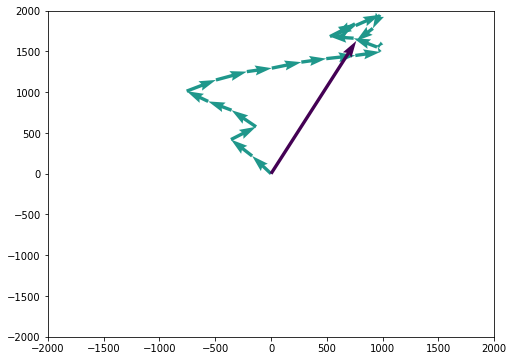

In [54]:
# List of 2D coordinates for every word in ALA's fingerprint
aa_values = [get_values(x) for x in aa_sentences[1]]

plt.figure(figsize=(8,6))
ax = plt.subplot(111)
plot_2D_vectors(aa_values, ax=ax, min_max_x=(-2000,2000), min_max_y=(-2000, 2000))
plt.show()

2D vector diagrams for every amino acid in the library

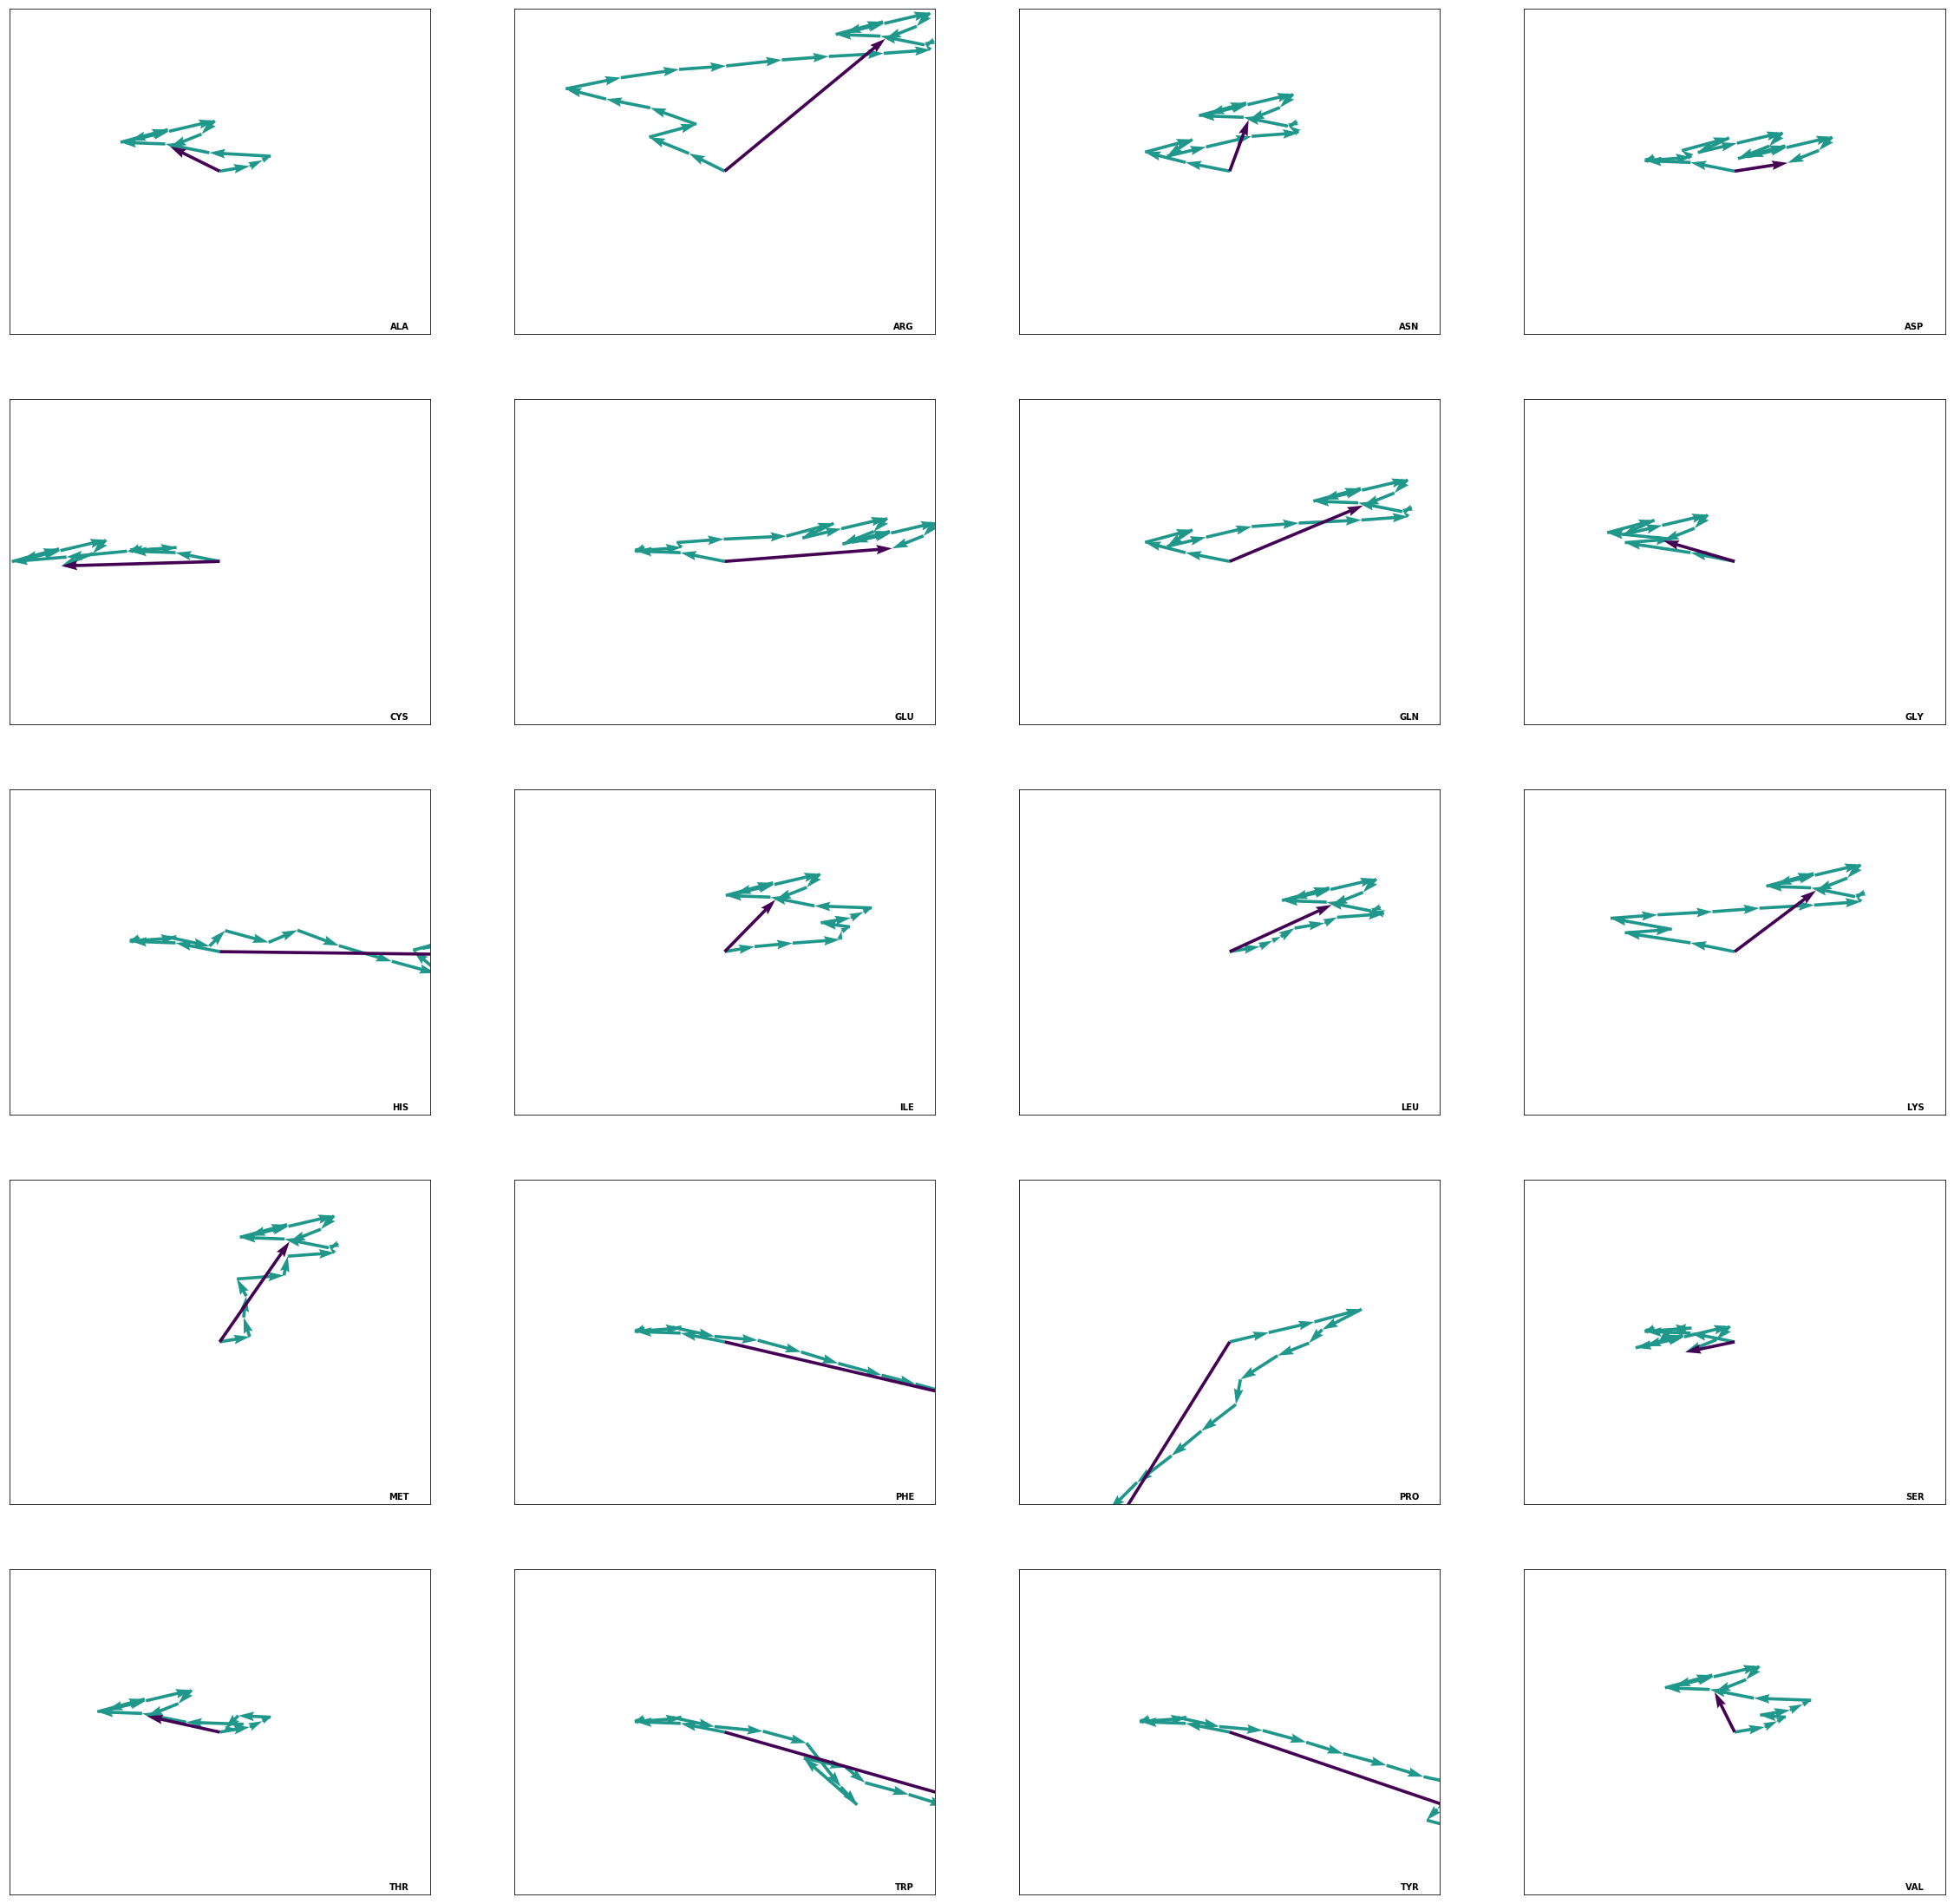

In [45]:
f, ((ALA, ARG, ASN, ASP), (CYS, GLU, GLN, GLY), (HIS, ILE, LEU, LYS), (MET, PHE, PRO, SER), (THR, TRP, TYR, VAL)) = plt.subplots(5,4, 
                                                    squeeze=True, sharex=True, sharey=True, 
                                                    figsize=(40,  40))

for aa,name,ax in zip(aas, aa_codes, (ALA, ARG, ASN, ASP, CYS, GLU, GLN, GLY, HIS, ILE, LEU, LYS, MET, PHE, PRO, SER, THR, TRP, TYR, VAL)):
    pca_subs = [get_values(x) for x in mol2alt_sentence(aa, 1)]
    plot_2D_vectors(pca_subs, ax=ax, min_max_x=(-1000,1000), min_max_y=(-2000, 2000))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.text(0.95, 0.01, u"%s" % name,
            verticalalignment='bottom', horizontalalignment='right',
            transform=ax.transAxes, weight='bold',
            fontsize=10)